In [58]:
# %% Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data Import 

In [59]:
dataset = pd.read_csv('D:\Thesis\Thesis-II\XNLP-Thesis\src\Lime Code Incorporate\lime\Dataset\healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [60]:
# %% Imports
print(dataset.shape)

(5110, 12)


In [61]:
# %% Imports
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [62]:
dataset = dataset.drop(['id'],axis='columns')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [63]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [64]:
# %% Imports
dataset['bmi'].dtype

dtype('float64')

In [65]:
dataset['bmi'].fillna(float(dataset['bmi'].mean()), inplace=True)
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [66]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [67]:
dataset['bmi'].dtype

dtype('float64')

In [68]:
dataset['bmi'].fillna(float(dataset['bmi'].mean()), inplace=True)
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [69]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [70]:
def genderToNumeric(gender):
    if gender == "Female":
        return 0
    else:
        return 1

def marriedToNumeric(marry):
    if marry == "Yes":
        return 1
    else:
        return 0   
    
def locationToNumeric(loc):
    if loc == "Urban":
        return 1
    else:
        return 0  

def worktypeToNumeric(worktype):
    if worktype == "Private":
        return 0
    elif worktype == "Govt_job":
        return 1  
    else: 
        return 2    
    
    
def smokeStatusToNumeric(smoking_status):
    if smoking_status == "Unknown":
        return 0
    elif smoking_status == "formerly smoked":
        return 1  
    elif smoking_status == "never smoked" :
        return 2 
    else: 
        return 3    

In [71]:
dataset['gender']= dataset['gender'].apply(genderToNumeric) 
dataset['ever_married']= dataset['ever_married'].apply(marriedToNumeric) 
dataset['work_type']= dataset['work_type'].apply(locationToNumeric) 
dataset['Residence_type']= dataset['Residence_type'].apply(worktypeToNumeric) 
dataset['smoking_status']= dataset['smoking_status'].apply(smokeStatusToNumeric) 

In [72]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,2,228.69,36.600000,1,1
1,0,61.0,0,0,1,0,2,202.21,28.893237,2,1
2,1,80.0,0,1,1,0,2,105.92,32.500000,2,1
3,0,49.0,0,0,1,0,2,171.23,34.400000,3,1
4,0,79.0,1,0,1,0,2,174.12,24.000000,2,1


In [73]:
dataset['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [74]:
X = dataset.drop(['stroke'],axis='columns')
#X.head(10)
len(X)

5110

In [75]:
y = dataset.stroke
#y.head(3)
len(y)

5110

In [76]:
# %% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrfit=lrmodel.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [78]:
pred =  lrmodel.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
pred_prob = lrmodel.predict_proba(X_test)

In [80]:
len(pred)

1022

In [81]:
lra=lrmodel.score(X_test, y_test)
print(lra)

0.9383561643835616


In [89]:
X_train
y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [135]:
import shap

explainer = shap.LinearExplainer(lrmodel, X_train, feature_dependence="independent")
shap_values = explainer(X_test)
#shap_values = explainer.shap_values(X_test)
#X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions



The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


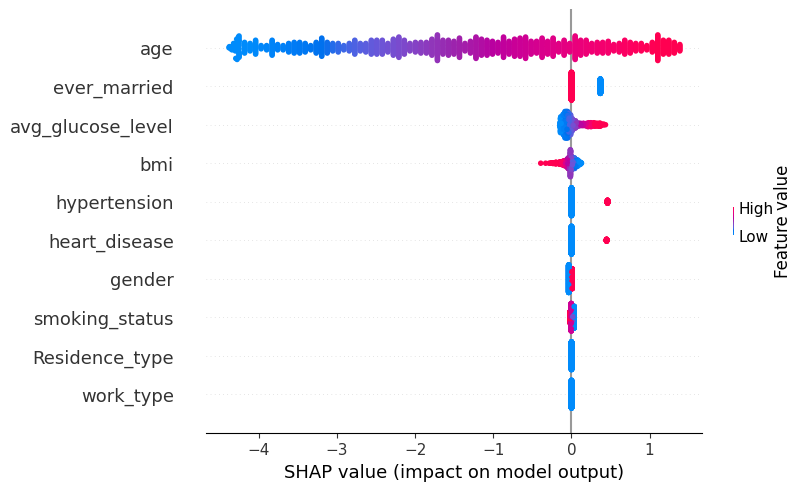

In [147]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

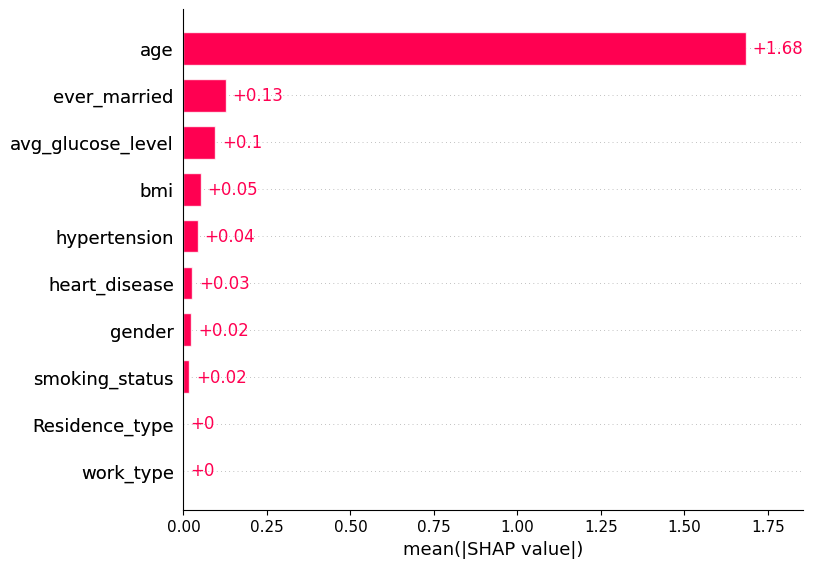

In [156]:
shap.plots.bar(shap_values)

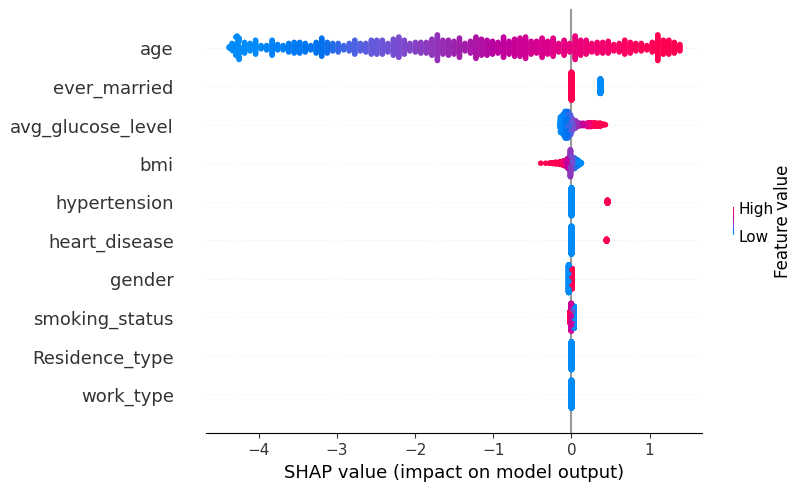

In [149]:
shap.plots.beeswarm(shap_values
                #  feature_names=X_test.columns(),
                  #plot_type='dot'
                  )

In [152]:
ind = 5
shap.plots.force(shap_values[ind])

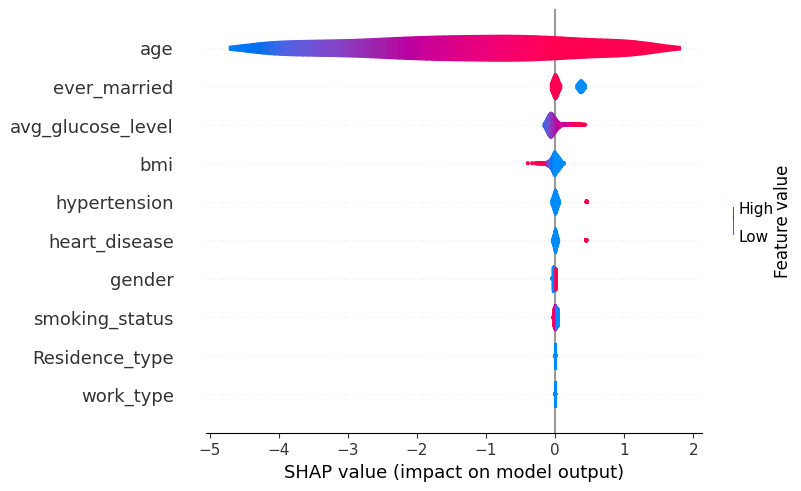

In [153]:
shap.summary_plot(shap_values, plot_type='violin')


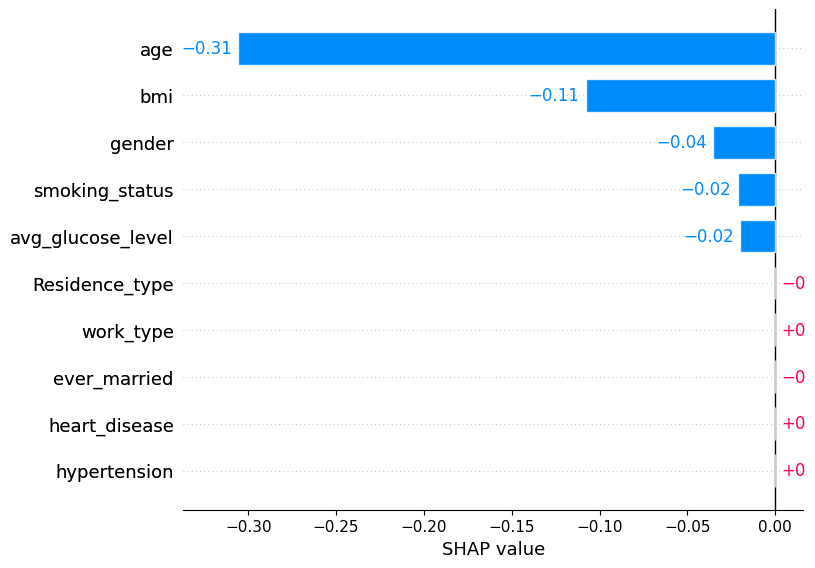

In [154]:
shap.plots.bar(shap_values[0])

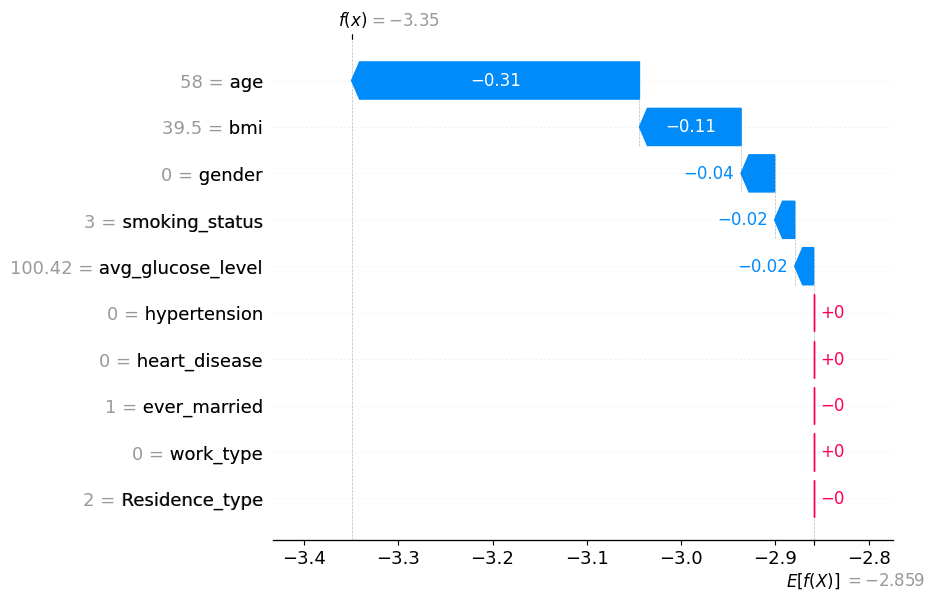

In [155]:
shap.plots.waterfall(shap_values[0])

In [130]:
ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind], X_test[ind],
    feature_names=X_test.columns
)

KeyError: 0

In [ ]:
import shap

explainer = shap.LinearExplainer(lrmodel, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

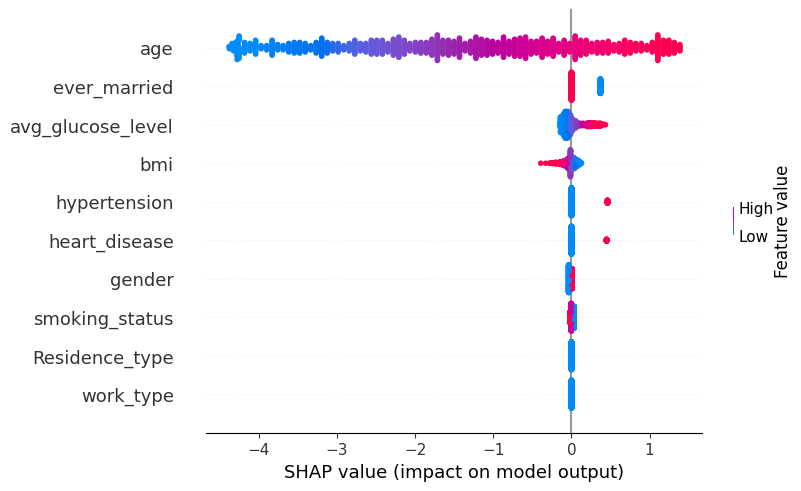

In [114]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [121]:
# prediction class 2, shap values for class 2
shap.force_plot(explainer.expected_value[0], shap_values[1][1], X_test[1], feature_names=X_test.columns)


IndexError: invalid index to scalar variable.

In [90]:
#Build an explainer

import shap

explainer = shap.LinearExplainer(lrmodel,
                                 X_train,
                                 feature_dependence="independent")

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [91]:
#Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)
shap_values[0]

array([-0.035623  , -0.30558176,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.02002549, -0.10785839, -0.02133788])

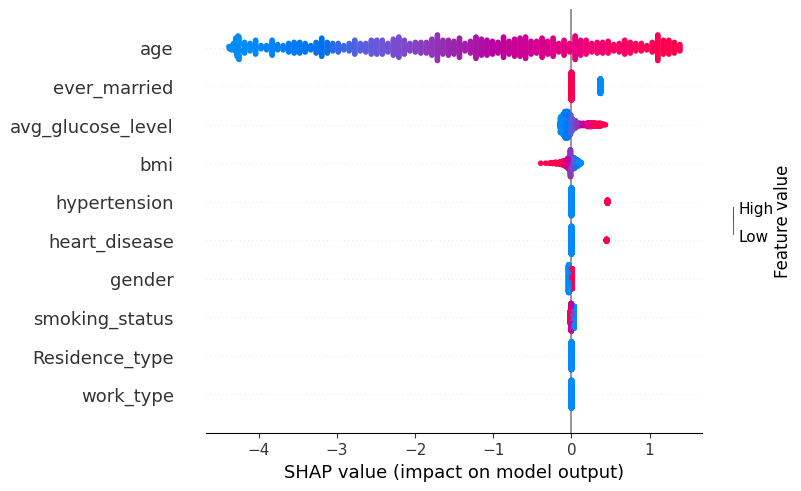

In [95]:
#Plot the features importance
X_test_array = X_test
shap.summary_plot(shap_values,
                  X_test_array,
                  )

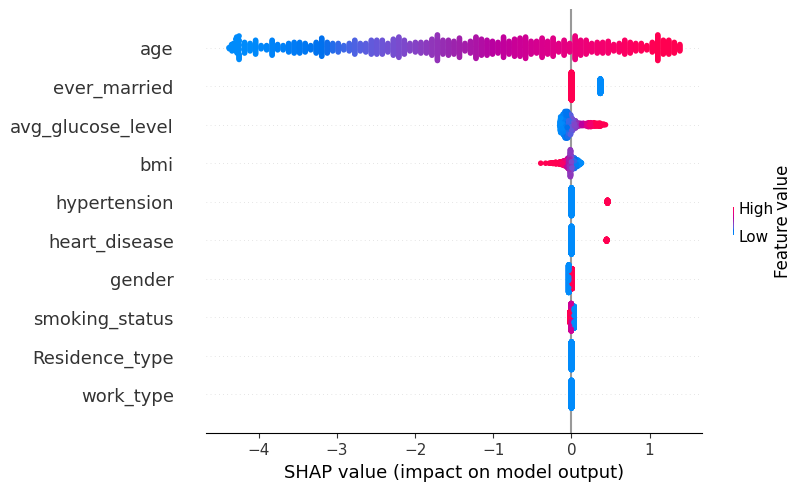

In [104]:
# shap_values does not work since it is recognized as `list` and default to `bar` chart only. 
# so it changed to shap_values[0]
shap.summary_plot(shap_values,
                  X_test,
                  feature_names=X_test.columns,
                  plot_type='dot')

In [110]:
ind = 0
shap.force_plot(
    explainer.expected_value, shap_values[ind], X_test[ind],
    feature_names=X_test.columns
)

KeyError: 0

In [82]:
# import shap  # package used to calculate Shap values


# X_train = X_train[0:6]
# # Create object that can calculate shap values
# k_explainer = shap.KernelExplainer(lrmodel.predict_proba, X_train)
# k_shap_values = k_explainer.shap_values(X_train)


# #visualiztion
# shap.initjs()
# shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], X_train)



X does not have valid feature names, but LogisticRegression was fitted with feature names
  0%|          | 0/6 [00:00<?, ?it/s]X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was